In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
capstone = pd.read_csv("911.csv")

In [3]:
capstone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Простые вопросы

In [4]:
capstone["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
capstone["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
len(capstone["title"].unique())

110

## Создание полей 

In [7]:
capstone["reason"] = capstone["title"].apply(lambda t: t.split(":")[0])

In [8]:
capstone["reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

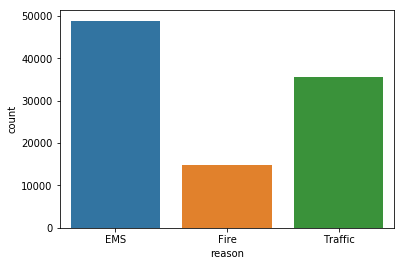

In [9]:
sns.countplot(x="reason", data=capstone)

In [10]:
capstone["timeStamp"].apply(lambda t: type(t)).unique()[0]

str

In [11]:
datetime = pd.to_datetime(capstone["timeStamp"])
capstone["Hour"] = datetime.apply(lambda d: d.hour)
capstone["Month"] = datetime.apply(lambda d: d.month)
capstone["Day of Week"] = datetime.apply(lambda d: d.weekday()).map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})

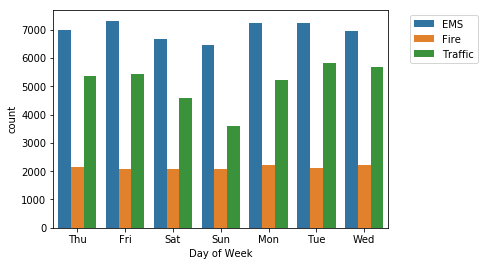

In [12]:
sns.countplot(x="Day of Week", data=capstone, hue="reason")
plt.legend(bbox_to_anchor=(1.05, 1))

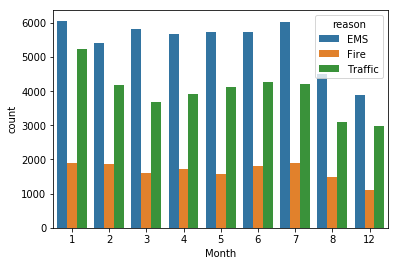

In [13]:
sns.countplot(x="Month", data=capstone, hue="reason")

In [14]:
capstone.groupby("Month").count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


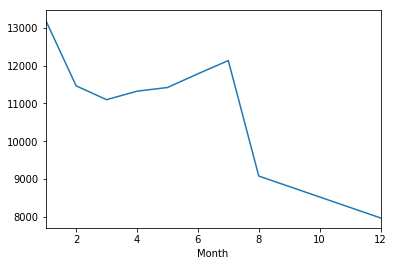

In [15]:
group_by_month = capstone.groupby("Month")
group_by_month["Month"].count().plot()

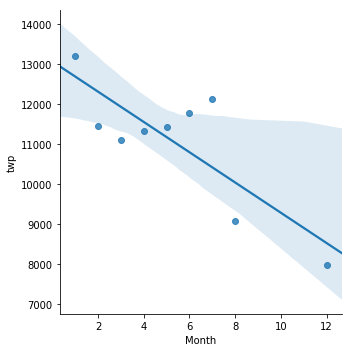

In [16]:
sns.lmplot(x="Month", y="twp", data=group_by_month.count().reset_index())

In [17]:
capstone["Date"] = datetime.apply(lambda d: d.date())

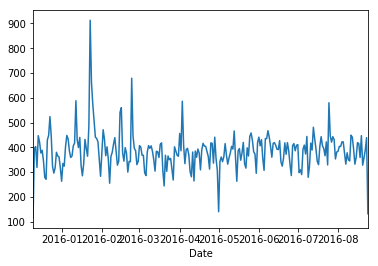

In [18]:
capstone.groupby("Date")["Date"].count().plot()

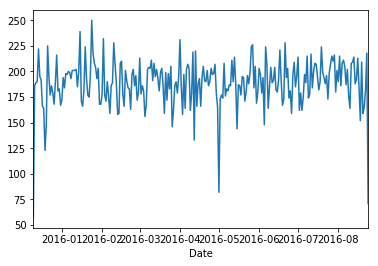

In [19]:
capstone[capstone["reason"] == "EMS"].groupby("Date")["Date"].count().plot()

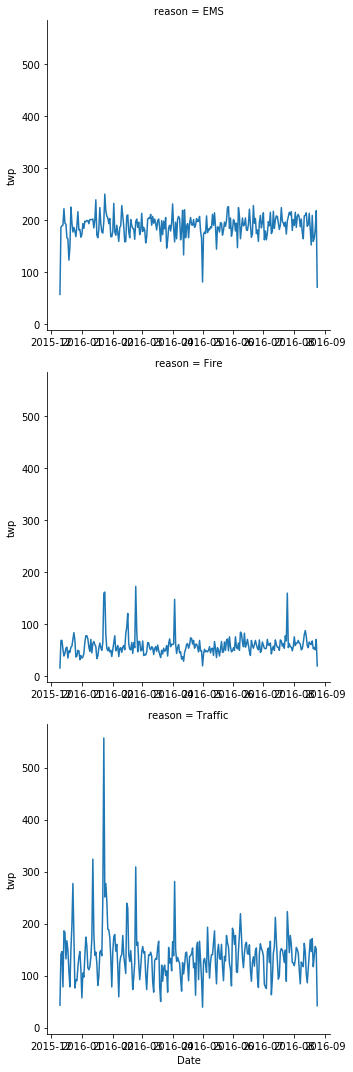

In [45]:
sns.FacetGrid(capstone.groupby(["Date", "reason"]).count().reset_index(), row="reason", size=5).map(plt.plot, "Date", "twp")

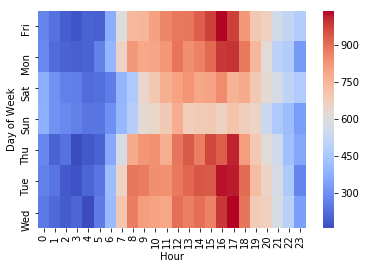

In [67]:
sns.heatmap(capstone.groupby(["Day of Week","Hour"]).count()["reason"].unstack(),cmap="coolwarm")

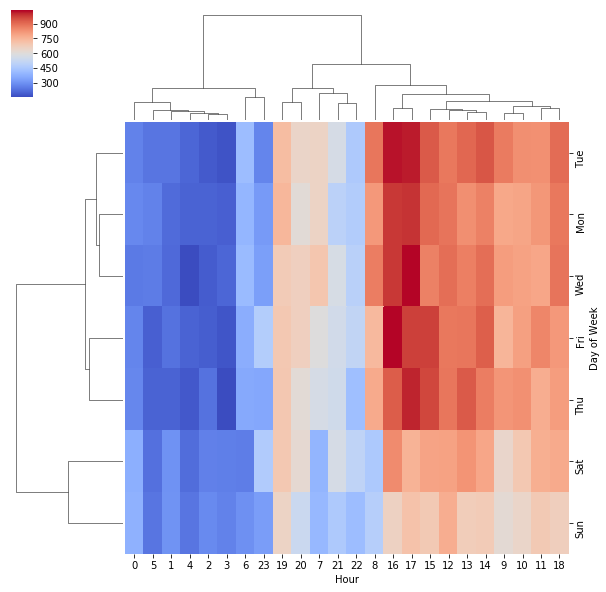

In [68]:
sns.clustermap(capstone.groupby(["Day of Week","Hour"]).count()["reason"].unstack(),cmap="coolwarm")

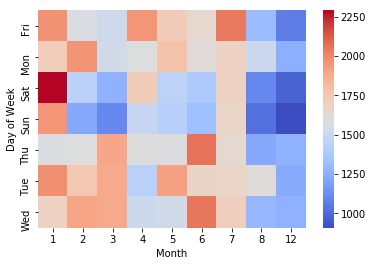

In [71]:
sns.heatmap(capstone.groupby(["Day of Week","Month"]).count()["reason"].unstack(),cmap="coolwarm")